Mini Project
EC 9170
Plant disease detection
2020/E/014
2020/E/082
2020/E/085
Group 15

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import shutil
from sklearn.model_selection import train_test_split

In [4]:
dataset_path = '/content/drive/MyDrive/plant_disease_detection'
diseased_path = os.path.join(dataset_path, 'diseased')
healthy_path = os.path.join(dataset_path, 'healthy')


In [5]:
base_dir = '/content/drive/MyDrive/plant_disease_detection'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

for dir in [train_dir, val_dir, test_dir]:
    os.makedirs(os.path.join(dir, 'diseased'), exist_ok=True)
    os.makedirs(os.path.join(dir, 'healthy'), exist_ok=True)

In [6]:
# Function to split and move files
def split_and_move_files(src_dir, train_dir, val_dir, test_dir, class_name):
    files = os.listdir(src_dir)
    train_files, test_files = train_test_split(files, test_size=0.1, random_state=42)
    train_files, val_files = train_test_split(train_files, test_size=0.2, random_state=42)

    for file in train_files:
        shutil.move(os.path.join(src_dir, file), os.path.join(train_dir, class_name, file))
    for file in val_files:
        shutil.move(os.path.join(src_dir, file), os.path.join(val_dir, class_name, file))
    for file in test_files:
        shutil.move(os.path.join(src_dir, file), os.path.join(test_dir, class_name, file))


split and move images to train,valisation and test folders

In [7]:
split_and_move_files(diseased_path, train_dir, val_dir, test_dir, 'diseased')
split_and_move_files(healthy_path, train_dir, val_dir, test_dir, 'healthy')

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

First model - VGG16

In [9]:
#VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


58889256/58889256 [==============================] - 0s 0us/step


In [10]:
#data generatos - VGG16
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/plant_disease_detection/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/plant_disease_detection/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 236 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


In [11]:
# Train the model
history_vgg16 = model.fit(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
8/8 [==============================] - 142s 18s/step - loss: 0.4876 - accuracy: 0.7797 - val_loss: 0.2595 - val_accuracy: 0.9286
Epoch 2/20
8/8 [==============================] - 139s 17s/step - loss: 0.1007 - accuracy: 0.9746 - val_loss: 0.9589 - val_accuracy: 0.4286
Epoch 3/20
8/8 [==============================] - 141s 18s/step - loss: 0.0657 - accuracy: 0.9831 - val_loss: 1.0709 - val_accuracy: 0.4286
Epoch 4/20
8/8 [==============================] - 139s 17s/step - loss: 0.0387 - accuracy: 0.9915 - val_loss: 0.9801 - val_accuracy: 0.5000
Epoch 5/20
8/8 [==============================] - 139s 17s/step - loss: 0.0258 - accuracy: 0.9958 - val_loss: 1.2705 - val_accuracy: 0.3571
Epoch 6/20
8/8 [==============================] - 141s 18s/step - loss: 0.0187 - accuracy: 0.9958 - val_loss: 1.4131 - val_accuracy: 0.3571
Epoch 7/20
8/8 [==============================] - 139s 17s/step - loss: 0.0135 - accuracy: 1.0000 - val_loss: 1.1732 - val_accuracy: 0.5000
Epoch 8/20
8/8 [====

In [12]:
#save model - VGG16
model.save('/content/drive/MyDrive/plant_disease_detection/vgg16_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

Second model - ResNet50

In [14]:
#ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

94765736/94765736 [==============================] - 1s 0us/step


In [15]:
#Data generators - ResNet50
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/plant_disease_detection/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/plant_disease_detection/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 236 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


In [16]:
#Train the model - Resnet50
history_resnet50 = model.fit(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
8/8 [==============================] - 56s 6s/step - loss: 1.1557 - accuracy: 0.8898 - val_loss: 0.2902 - val_accuracy: 0.9286
Epoch 2/20
8/8 [==============================] - 48s 6s/step - loss: 0.3674 - accuracy: 0.8941 - val_loss: 0.2452 - val_accuracy: 0.9286
Epoch 3/20
8/8 [==============================] - 51s 6s/step - loss: 0.3250 - accuracy: 0.8983 - val_loss: 0.4209 - val_accuracy: 0.9286
Epoch 4/20
8/8 [==============================] - 49s 6s/step - loss: 0.2690 - accuracy: 0.9153 - val_loss: 0.1984 - val_accuracy: 0.9286
Epoch 5/20
8/8 [==============================] - 48s 6s/step - loss: 0.2144 - accuracy: 0.9153 - val_loss: 0.3182 - val_accuracy: 0.9286
Epoch 6/20
8/8 [==============================] - 52s 6s/step - loss: 0.1987 - accuracy: 0.9322 - val_loss: 0.2101 - val_accuracy: 1.0000
Epoch 7/20
8/8 [==============================] - 49s 6s/step - loss: 0.1910 - accuracy: 0.9195 - val_loss: 0.3929 - val_accuracy: 0.7857
Epoch 8/20
8/8 [==================

In [17]:
#save model - ResNet50
model.save('/content/drive/MyDrive/plant_disease_detection/resnet50_model.h5')

Evaluating both models

In [18]:
import matplotlib.pyplot as plt

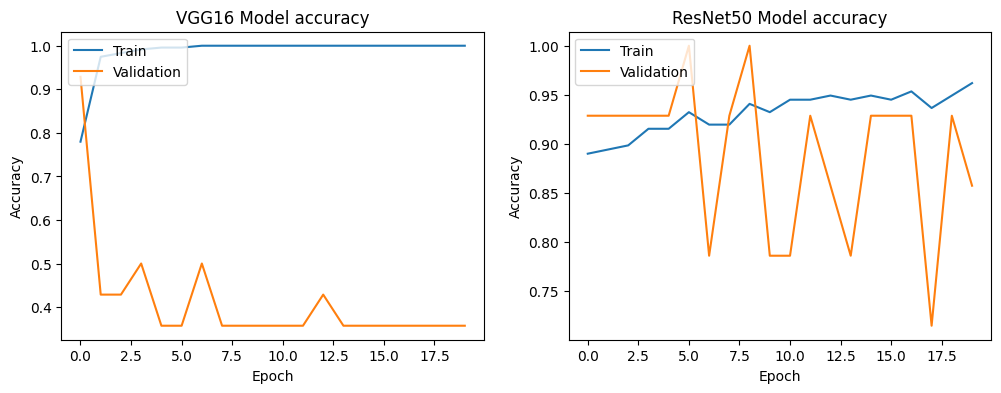

In [19]:
#accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('VGG16 Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_resnet50.history['accuracy'])
plt.plot(history_resnet50.history['val_accuracy'])
plt.title('ResNet50 Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

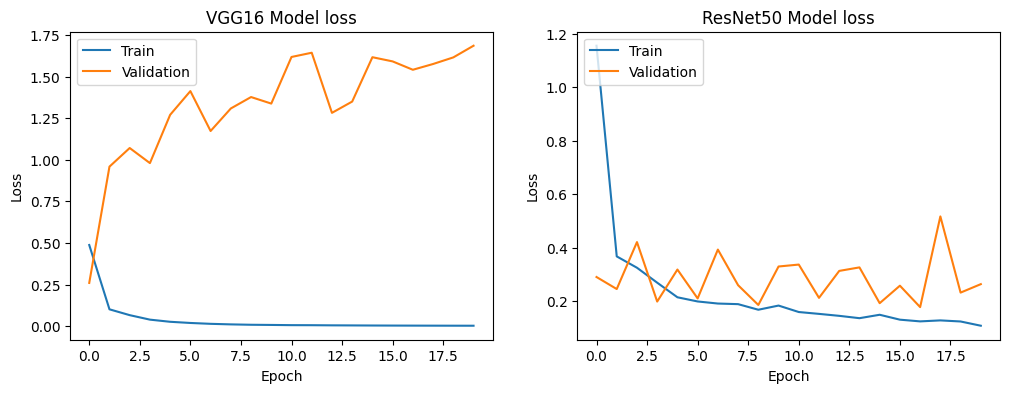

In [20]:
#loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_vgg16.history['loss'])
plt.plot(history_vgg16.history['val_loss'])
plt.title('VGG16 Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_resnet50.history['loss'])
plt.plot(history_resnet50.history['val_loss'])
plt.title('ResNet50 Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [24]:
#loading models
vgg16_model = load_model('/content/drive/MyDrive/plant_disease_detection/vgg16_model.h5')
resnet50_model = load_model('/content/drive/MyDrive/plant_disease_detection/resnet50_model.h5')

In [26]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Evaluate models on the test set
loss_vgg16, accuracy_vgg16 = vgg16_model.evaluate(test_generator)
loss_resnet50, accuracy_resnet50 = resnet50_model.evaluate(test_generator)

# Calculate average accuracies over 20 epochs
vgg16_avg_train_accuracy = np.mean(history_vgg16.history['accuracy'])
vgg16_avg_val_accuracy = np.mean(history_vgg16.history['val_accuracy'])
resnet50_avg_train_accuracy = np.mean(history_resnet50.history['accuracy'])
resnet50_avg_val_accuracy = np.mean(history_resnet50.history['val_accuracy'])

# Print the results
print(f"VGG16 Model - Average Training Accuracy (20 Epochs): {vgg16_avg_train_accuracy}")
print(f"VGG16 Model - Average Validation Accuracy (20 Epochs): {vgg16_avg_val_accuracy}")
print(f"VGG16 Model - Test Accuracy: {accuracy_vgg16}")

print(f"ResNet50 Model - Average Training Accuracy (20 Epochs): {resnet50_avg_train_accuracy}")
print(f"ResNet50 Model - Average Validation Accuracy (20 Epochs): {resnet50_avg_val_accuracy}")
print(f"ResNet50 Model - Test Accuracy: {accuracy_resnet50}")

Found 41 images belonging to 2 classes.
2/2 [==============================] - 8s 2s/step - loss: 0.2465 - accuracy: 0.9024
VGG16 Model - Average Training Accuracy (20 Epochs): 0.9860169470310212
VGG16 Model - Average Validation Accuracy (20 Epochs): 0.410714291036129
VGG16 Model - Test Accuracy: 0.8292682766914368
ResNet50 Model - Average Training Accuracy (20 Epochs): 0.931779658794403
ResNet50 Model - Average Validation Accuracy (20 Epochs): 0.8892856985330582
ResNet50 Model - Test Accuracy: 0.9024389982223511


In [27]:
#summarize - VGG16
print("VGG16 Model Summary:")
vgg16_model.summary()

VGG16 Model Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 21137729 (80.63 MB)
Trainable params: 6423041 (24.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [28]:
#summarize - ResNet50
print("\nResNet50 Model Summary:")
resnet50_model.summary()


ResNet50 Model Summary:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_2 (Dense)             (None, 256)               25690368  
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 49278337 (187.98 MB)
Trainable params: 25690625 (98.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


Testing model with images

In [29]:
#preprocessing images
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img, img_array

In [53]:
#predicting disease
def predict_disease(model, img_array):
    prediction = model.predict(img_array)
    if prediction[0] < 0.5:
        return 'Diseased'
    else:
        return 'Healthy'

In [60]:
#test image
test_image_path = '/content/drive/MyDrive/plant_disease_detection/test/healthy/1046.JPG.jpeg'
test_image, test_image_array = load_and_preprocess_image(test_image_path)

In [61]:
#VGG16
vgg16_prediction = predict_disease(vgg16_model, test_image_array)

#ResNet50
resnet50_prediction = predict_disease(resnet50_model, test_image_array)

1/1 [==============================] - 0s 184ms/step


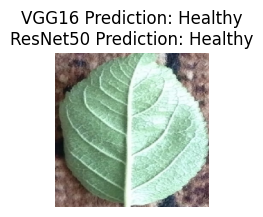

In [62]:
plt.figure(figsize=(2, 2))
plt.imshow(test_image)
plt.title(f'VGG16 Prediction: {vgg16_prediction}\nResNet50 Prediction: {resnet50_prediction}')
plt.axis('off')
plt.show()